# Nearest Neighbors
In this notebook, I will create a simple nearest neighbors model to classify the leaves dataset as provided by Kaggle. I make use of euclidean distances, k nearest neighbors, log loss as a metric and cross validation.

* **Proccessing Data**
    * Loading Dada
    * Extract features & labels
    * Normalize Features
    * Training & Validation Split
* **Nearest Neighbors**
    * Euclidean Distances
    * K Nearest Neighbors
    * Probability Dataframe
    * Predictions
    * Log Loss Metric
    * Cross-Validation
    * Probabilities Testing Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Proccess Data
## Loading Data
First, the train and test data is loaded into a pandas dataframe.

In [2]:
data = pd.read_csv('../input/train.csv', index_col=0)
testData = pd.read_csv('../input/test.csv', index_col=0)
data.head(6)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250
8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,0.003906,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.0,0.0,0.000000,0.001953,0.013672


## Extract features & labels
We shuffle the data in this early stadium, to avoid index influence when splitting into training and validation sets. Next, the training labels and features are being separated.

In [3]:
data = data.sample(frac=1)
features = data[data.columns[1:193]]
labels = data['species']

In [4]:
features.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
562,0.035156,0.064453,0.011719,0.001953,0.000000,0.166020,0.007812,0.0,0.009766,0.046875,...,0.317380,0.000000,0.030273,0.000000,0.005859,0.000000,0.0,0.000000,0.019531,0.019531
1482,0.003906,0.003906,0.076172,0.027344,0.025391,0.025391,0.031250,0.0,0.003906,0.021484,...,0.000000,0.000000,0.002930,0.010742,0.019531,0.000000,0.0,0.000000,0.000000,0.008789
733,0.013672,0.009766,0.060547,0.044922,0.001953,0.025391,0.015625,0.0,0.007812,0.033203,...,0.000000,0.008789,0.000000,0.016602,0.000000,0.025391,0.0,0.171880,0.000000,0.000000
270,0.023438,0.015625,0.021484,0.009766,0.000000,0.101560,0.029297,0.0,0.005859,0.044922,...,0.007812,0.000000,0.058594,0.000000,0.000000,0.000000,0.0,0.000000,0.053711,0.046875
1198,0.009766,0.031250,0.003906,0.005859,0.005859,0.009766,0.054688,0.0,0.000000,0.042969,...,0.113280,0.000000,0.028320,0.000000,0.019531,0.000000,0.0,0.000977,0.000000,0.005859


## Normalize Features
The training and testing features are being normalized.

In [5]:
features = features / np.linalg.norm(features, axis=0)
testData = testData / np.linalg.norm(testData, axis=0)
features.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
562,0.042462,0.042504,0.009058,0.001690,0.000000,0.081488,0.009556,0.0,0.027110,0.060545,...,0.137929,0.000000,0.034176,0.000000,0.008375,0.000000,0.0,0.000000,0.037720,0.020749
1482,0.004718,0.002576,0.058878,0.023667,0.034685,0.012463,0.038227,0.0,0.010843,0.027750,...,0.000000,0.000000,0.003308,0.012379,0.027917,0.000000,0.0,0.000000,0.000000,0.009337
733,0.016513,0.006440,0.046801,0.038882,0.002668,0.012463,0.019114,0.0,0.021686,0.042886,...,0.000000,0.013999,0.000000,0.019132,0.000000,0.013072,0.0,0.124208,0.000000,0.000000
270,0.028308,0.010304,0.016606,0.008453,0.000000,0.049849,0.035838,0.0,0.016264,0.058023,...,0.003395,0.000000,0.066149,0.000000,0.000000,0.000000,0.0,0.000000,0.103731,0.049799
1198,0.011795,0.020608,0.003019,0.005071,0.008004,0.004793,0.066898,0.0,0.000000,0.055500,...,0.049230,0.000000,0.031971,0.000000,0.027917,0.000000,0.0,0.000706,0.000000,0.006224


## Training & Validation Split
To test some later helper functions, we split the training data into a train and validation set. Later, we'll do this again via cross-validation. For now, we put aside one tenth for validation. As we shuffled already, we can just split via indeces.

In [6]:
trainFeatures = features.iloc[:891,:]
validFeatures = features.iloc[891:,:]
trainLabels =  labels.iloc[:891]
validLabels = labels.iloc[891:]

# Nearest Neighbors
## Euclidean Distances
Let's say we want to get the closest neighbor in the training set for the datapoint with index 1 in the validation set. We create a function to calculate all euclidean distances between this query on the one hand, and all training points on the other. Then, we take a look at the label of the training point with the lowest distance. The label turns out to be the same as the label of the query.

In [7]:
#Computes distance(s) between a query and training point(s)
def computeDistances(trainData, query):
    distances = np.sqrt(np.sum((trainData - query)**2, axis=1))
    return distances
distances = computeDistances(trainFeatures, validFeatures.iloc[1,:])
trainLabels.loc[distances.argmin()]

'Salix_Fragilis'

In [8]:
validLabels.iloc[1]

'Salix_Fragilis'

## K Nearest Neighbors
Now, we would like a given number (k) of close neighbors, representing a probability distribution. All k nearest neighbors are equally weighted, each with a probability of 1/k. We create a function that, for a given query, returns a dictionary with the closest neighbors and their probabilities as the value.

In [9]:
def getNearestNeighbors(trainFeatures, trainLabels, query, k):
    distances = computeDistances(trainFeatures, query)
    lowestTen = distances.sort_values().head(k).index
    results = dict()
    for x in trainLabels[lowestTen]:
        if x not in results:
            results[x] = 1/float(k)
        else:
            results[x] += 1/float(k)
    return results

In [10]:
getNearestNeighbors(trainFeatures, trainLabels, validFeatures.iloc[1,:], 10)

{'Acer_Rufinerve': 0.1,
 'Betula_Pendula': 0.1,
 'Pterocarya_Stenoptera': 0.1,
 'Quercus_Coccifera': 0.1,
 'Salix_Fragilis': 0.5,
 'Tilia_Tomentosa': 0.1}

So in this instance with k=10, each 0.1 acts as a 'vote' for that leaf class.

## Probability Dataframe
The purpose of the following, is to generate dictionaries as above for all queries in a validation or test set, and to collect the probabilities in one dataframe. First, we store all the unique leaf classes in alphabetical order for this dataframe. We initiate this probability dataframe with all zeros. Then, we loop per query through the closest neighbors, adjusting the appropriate position in the probability dataframe.

In [11]:
def getProbabilities(trainFeatures, trainLabels, testFeatures, k):
    leaves = np.unique(data.species.sort_values().values)
    probabilities = pd.DataFrame(0, index=testFeatures.index, columns=leaves)
    for index, query in zip(testFeatures.index, testFeatures.values):
        for key, value in getNearestNeighbors(trainFeatures, trainLabels, query, k).items():
            probabilities.loc[index, key] = value
    return probabilities

In [12]:
getProbabilities(trainFeatures, trainLabels, validFeatures, 100).head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
1347,0.00,0.00,0.02,0.04,0.0,0.00,0.00,0.00,0.0,0.0,...,0.00,0.07,0.0,0.00,0.00,0.00,0.00,0.06,0.0,0.00
1543,0.06,0.00,0.00,0.03,0.0,0.00,0.00,0.08,0.1,0.0,...,0.06,0.00,0.0,0.03,0.01,0.09,0.07,0.00,0.0,0.00
1206,0.00,0.00,0.06,0.00,0.0,0.01,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.06,0.0,0.00
1539,0.00,0.00,0.02,0.01,0.0,0.06,0.02,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.03,0.0,0.00
323,0.05,0.02,0.00,0.10,0.0,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.02,0.00,0.04,0.0,0.05


Here we used a massive k-value, just to view some probabilities. Note that each row will sum to one, as it forms a probability distribution of the 99 leaf classes.

## Predictions
Based on the probabilites, we are now interested in the leaf class with the highest probabilty, as this one would of course be our prediction if we had to make one. So we generate a probability dataframe, and return the leaf class with the highest probability per row.

In [13]:
def getPredictions(trainFeatures, trainLabels, testFeatures, k):
    testProbabilities = getProbabilities(trainFeatures, trainLabels, testFeatures, k)
    return testProbabilities.idxmax(axis = 1)

In [14]:
validPredictions = getPredictions(trainFeatures, trainLabels, validFeatures, 10)
validPredictions.head()

id
1347          Ilex_Cornuta
1543        Salix_Fragilis
1206    Magnolia_Heptapeta
1539      Quercus_Coccinea
323      Quercus_Vulcanica
dtype: object

The above leaf classes are our predictions for the first five validation leaves, based on ten nearest neighbors. We'll see next that the log loss is a more interesting metric, but at the point, we could calculate the accuracy as well. We just check how many times the our prediction corresponds with the label, and divide this number by the total number of labels.

In [15]:
accuracy = sum(validPredictions==validLabels)/float(len(validLabels))
accuracy

0.87878787878787878

## Log Loss Metric
The log loss is the metric uses at Kaggle, and accounts for (un)certainty. This is the formula, where L is the number of query leaves, C is the number of leaf classes, y is a binary value indicating whether leaf l actually belongs to class c (1 of so, 0 if not), and p is the probability that leaf l belongs to class c.

$$\text{logloss} = -\frac{1}{L}\sum_{l=1}^L\sum_{c=1}^C{y_{lc}log(p_{lc})}$$

Here we implement the log loss function for a given training and validation set. Note that we substitute extreme values (0 and 1) in the probability matrix by very close values (0.0...01 and 0.99...) to make the log working.

In [16]:
def getLogLoss(trainFeatures, trainLabels, validFeatures, validLabels, k):
    leaves = np.unique(data.species.sort_values().values)
    validProbabilities = getProbabilities(trainFeatures, trainLabels, validFeatures, k)
    totalLoss = 0
    for index, row in zip(validProbabilities.index, validProbabilities.values):
        bools = np.zeros(99)
        bools[np.where(leaves==validLabels.loc[index])] = 1
        probs = np.zeros(len(row))
        for i, x in enumerate(row):
            probs[i] = np.log(max(min(x,1-10**-15),10**-15))
        totalLoss += sum(bools*probs)
    logLoss = totalLoss / -len(validProbabilities.values)
    return logLoss

In [17]:
for i in range(15):
    print('k = ' + str(i+1) + ': ' + str(getLogLoss(trainFeatures, trainLabels, validFeatures, validLabels, i+1)))

k = 1: 0.697753058483
k = 2: 0.411889909292
k = 3: 0.43831658322
k = 4: 0.479388441625
k = 5: 0.526839325465
k = 6: 0.564864739188
k = 7: 0.637120977118
k = 8: 0.713813819554
k = 9: 0.790526702809
k = 10: 0.87372662513
k = 11: 0.953210922618
k = 12: 1.01973694005
k = 13: 1.0911922646
k = 14: 1.15210577561
k = 15: 1.20463763074


Here we calculated the logloss for 10 different values of k.

## Cross-Validation
The log loss as calculated above is quite heavily influenced by the choice of the test and validations split, though. By cross-validation, we reduce this variation. For a given number of folds, we run a logLoss on shifting validation sets. We then take the average of theses losses as our final logloss. The function takes the original features and labels as arguments.

In [18]:
def crossValidation(features, labels, folds, k):
    n = len(features)
    totalLoss = 0
    for i in range(folds):
        start = int((n*i)/folds)
        end = int((n*(i+1))/folds)
        validFeatures = features.iloc[start:end,:]   
        validLabels = labels.iloc[start:end]   
        trainFeatures = features.iloc[0:start,:].append(features.iloc[end:n,:])        
        trainLabels = labels.iloc[0:start].append(labels.iloc[end:n])        
        totalLoss += getLogLoss(trainFeatures, trainLabels, validFeatures, validLabels, k)
    averageLoss = totalLoss / folds
    return averageLoss

In [19]:
lossAll = np.zeros(15)
for i in range(15):
    lossAll[i] = crossValidation(features, labels, folds=10, k=i+1)
    print('k = ' + str(i+1) + ': ' + str(lossAll[i]))

k = 1: 0.83730367018
k = 2: 0.566724011231
k = 3: 0.500667153768
k = 4: 0.50673449571
k = 5: 0.45294835155
k = 6: 0.466092417793
k = 7: 0.453235023134
k = 8: 0.482162802798
k = 9: 0.555710547065
k = 10: 0.631921638916
k = 11: 0.704907654756
k = 12: 0.76956438881
k = 13: 0.835328481579
k = 14: 0.897450940104
k = 15: 0.924641531558


Here we did the same as above, but with cross-validation (folding the data 10 times). The differenses are: (1) the values are much more stable and will be similar when rerun, (2) the calculation takes longer as, per k-value, the logLoss is calculated ten times. We can simply visualize these numbers to see that a k-value of about 5 results in the lowest logloss.

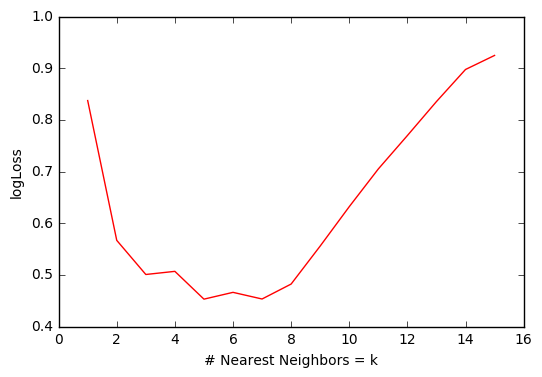

In [20]:
plt.plot(range(1, 16),lossAll, 'r')
plt.xlabel('# Nearest Neighbors = k')
plt.ylabel('logLoss')
plt.show()

## Probabilities Testing Set
Given the loglosses calculated above, we create a probability dataframe with k=5, based on all of the training data, for the test set.

In [21]:
submission = getProbabilities(features, labels, testData, 5)
submission.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
